# Load Dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/tweet_location_emotion.xlsx"
df = pd.read_excel(file_path)
# Display the first few rows
df

,User_id,User_Location,Tweet_Content,Tweet_Language,Tweet_DateTime
0,1,"Cambridge, MA",These questions about what wildlife exactly wa...,en,2021-12-31 01:27:19+00:00
1,2,NaN,I thought with COVID was the foundation that b...,en,2021-12-31 01:27:02+00:00
2,3,NaN,@PeterCBC Peter can you please put some hard q...,en,2021-12-31 01:26:22+00:00
3,4,NC,"between mass shootings, COVID, and wildfires, ...",en,2021-12-31 01:26:13+00:00
4,5,"Cambridge, MA",Lab leak proponents have been advocating endle...,en,2021-12-31 01:26:02+00:00
...,...,...,...,...,...
361061,361062,In God's Hands,The Chinese government's attempt to cover up S...,en,2020-01-08 17:53:02+00:00
361062,361063,Hong Kong,38 suspected #WuHanPneumonia in Hong Kong toda...,en,2020-01-08 10:29:12+00:00
361063,361064,New York and Geneva,The Chinese government's attempt to cover up S...,en,2020-01-08 01:16:10+00:00
361064,361065,NaN,@charlesmok @SolomonYue Worse than it seems-bi...,en,2020-01-07 18:25:38+00:00


In [ ]:
df.dropna(inplace=True)

# Data Preprocessing and Cleaning

In [ ]:
# Replace NaN values with an empty string
df = df.sample(n=10000, random_state=42).reset_index(drop=True)

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from transformers import pipeline
import nltk
nltk.download('stopwords')



# Function to clean the text
def clean_text(text):
    if not text:  # Handle empty or None values
        return ""

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove mentions (@username)
    text = re.sub(r"@\w+", "", text)

    # Remove hashtags (#topic)
    text = re.sub(r"#\w+", "", text)

    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords (optional)
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])

    return text

# Clean the tweet content
df["Cleaned_Tweet"] = df["Tweet_Content"].apply(clean_text)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,User_id,User_Location,Tweet_Content,Tweet_Language,Tweet_DateTime,Cleaned_Tweet
0,185679,"Nelson City, New Zealand",@PamelaT34912263 @hamishpricenz I think the vi...,en,2020-03-25 08:44:30+00:00,think videos chinese welded apartments gave aw...
1,343712,"Vero Beach, FL",The White House has ordered federal health off...,en,2020-03-11 21:55:30+00:00,white house ordered federal health officials t...
2,186749,"Earth, Solar System",@davidfrawleyved @GroovyHKLover @eOrganiser @W...,tl,2020-03-25 06:41:32+00:00,ccps puppet came p lab wuhan wuhan chinas cher...
3,221604,Ireland,Russia has a population of 145 million people....,en,2020-03-20 12:31:39+00:00,russia population million people date confirme...
4,343189,United Kingdom,I saw this on the Sun app and thought you'd be...,en,2020-03-11 22:53:28+00:00,saw sun app thought youd interested coronaviru...
...,...,...,...,...,...,...
9995,66731,"Livonia, MI",Check out MyMySweetCherie2.0's video! #TikTok ...,ht,2021-08-30 12:36:37+00:00,check mymysweetcheries video
9996,248746,Cheshire and Merseyside,Champs Support Team are now following governme...,en,2020-03-18 13:56:48+00:00,champs support team following government guida...
9997,257531,United States,Joe Biden Sides With Big Pharma Against Plan T...,en,2020-03-17 21:53:14+00:00,joe biden sides big pharma plan could make cor...
9998,99999,"New York, NY","""Tea War"" author Andrew Liu has written an art...",en,2020-03-31 14:06:04+00:00,tea war author andrew liu written article n co...


# Locations Extraction

In [ ]:
# !pip install geotext

In [ ]:
import pandas as pd
from geotext import GeoText


# Function to extract country and state
def extract_location(location):
    # Ensure the location is treated as a string
    location = str(location) if location is not None else ""
    if not location.strip():
        return "Unknown", "Unknown"
    places = GeoText(location)
    country = ", ".join(places.countries) if places.countries else "Unknown"
    state = ", ".join(places.cities) if places.cities else "Unknown"
    return country, state

# Apply the function and create new columns
df[['Country', 'State']] = df['User_Location'].apply(lambda loc: pd.Series(extract_location(loc)))

df

,User_id,User_Location,Tweet_Content,Tweet_Language,Tweet_DateTime,Cleaned_Tweet,Country,State
0,185679,"Nelson City, New Zealand",@PamelaT34912263 @hamishpricenz I think the vi...,en,2020-03-25 08:44:30+00:00,think videos chinese welded apartments gave aw...,New Zealand,Unknown
1,343712,"Vero Beach, FL",The White House has ordered federal health off...,en,2020-03-11 21:55:30+00:00,white house ordered federal health officials t...,Unknown,Vero Beach
2,186749,"Earth, Solar System",@davidfrawleyved @GroovyHKLover @eOrganiser @W...,tl,2020-03-25 06:41:32+00:00,ccps puppet came p lab wuhan wuhan chinas cher...,Unknown,Unknown
3,221604,Ireland,Russia has a population of 145 million people....,en,2020-03-20 12:31:39+00:00,russia population million people date confirme...,Ireland,Unknown
4,343189,United Kingdom,I saw this on the Sun app and thought you'd be...,en,2020-03-11 22:53:28+00:00,saw sun app thought youd interested coronaviru...,United Kingdom,Unknown
...,...,...,...,...,...,...,...,...
9995,66731,"Livonia, MI",Check out MyMySweetCherie2.0's video! #TikTok ...,ht,2021-08-30 12:36:37+00:00,check mymysweetcheries video,Unknown,Livonia
9996,248746,Cheshire and Merseyside,Champs Support Team are now following governme...,en,2020-03-18 13:56:48+00:00,champs support team following government guida...,Unknown,Cheshire
9997,257531,United States,Joe Biden Sides With Big Pharma Against Plan T...,en,2020-03-17 21:53:14+00:00,joe biden sides big pharma plan could make cor...,United States,Unknown
9998,99999,"New York, NY","""Tea War"" author Andrew Liu has written an art...",en,2020-03-31 14:06:04+00:00,tea war author andrew liu written article n co...,Unknown,New York


# Emotions Detection

In [ ]:
# Function to detect emotion from cleaned tweet
emotion_classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion")

def detect_emotion(tweet):
    emotion = emotion_classifier(tweet)
    return emotion[0]['label']

# Apply emotion detection to each cleaned tweet
df["Emotion"] = df["Cleaned_Tweet"].apply(detect_emotion)

# Display the updated dataset with emotions
df

,User_id,User_Location,Tweet_Content,Tweet_Language,Tweet_DateTime,Cleaned_Tweet,Country,State,Emotion
0,185679,"Nelson City, New Zealand",@PamelaT34912263 @hamishpricenz I think the vi...,en,2020-03-25 08:44:30+00:00,think videos chinese welded apartments gave aw...,New Zealand,Unknown,fear
1,343712,"Vero Beach, FL",The White House has ordered federal health off...,en,2020-03-11 21:55:30+00:00,white house ordered federal health officials t...,Unknown,Vero Beach,fear
2,186749,"Earth, Solar System",@davidfrawleyved @GroovyHKLover @eOrganiser @W...,tl,2020-03-25 06:41:32+00:00,ccps puppet came p lab wuhan wuhan chinas cher...,Unknown,Unknown,anger
3,221604,Ireland,Russia has a population of 145 million people....,en,2020-03-20 12:31:39+00:00,russia population million people date confirme...,Ireland,Unknown,joy
4,343189,United Kingdom,I saw this on the Sun app and thought you'd be...,en,2020-03-11 22:53:28+00:00,saw sun app thought youd interested coronaviru...,United Kingdom,Unknown,joy
...,...,...,...,...,...,...,...,...,...
9995,66731,"Livonia, MI",Check out MyMySweetCherie2.0's video! #TikTok ...,ht,2021-08-30 12:36:37+00:00,check mymysweetcheries video,Unknown,Livonia,joy
9996,248746,Cheshire and Merseyside,Champs Support Team are now following governme...,en,2020-03-18 13:56:48+00:00,champs support team following government guida...,Unknown,Cheshire,joy
9997,257531,United States,Joe Biden Sides With Big Pharma Against Plan T...,en,2020-03-17 21:53:14+00:00,joe biden sides big pharma plan could make cor...,United States,Unknown,joy
9998,99999,"New York, NY","""Tea War"" author Andrew Liu has written an art...",en,2020-03-31 14:06:04+00:00,tea war author andrew liu written article n co...,Unknown,New York,joy


In [ ]:
# from transformers import pipeline

# # Load a pre-trained sentiment analysis model
# sentiment_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# # Function to detect sentiment
# def detect_sentiment(tweet):
#     try:
#         sentiment = sentiment_classifier(tweet)
#         sentiment_label = sentiment[0]['label']
#         # Map sentiment labels to desired format
#         if sentiment_label == "POSITIVE":
#             return "positive"
#         elif sentiment_label == "NEGATIVE":
#             return "negative"
#         else:
#             return "neutral"
#     except Exception as e:
#         # Handle exceptions and mark as neutral
#         return "neutral"

# # Apply sentiment detection to each cleaned tweet
# df["Sentiment"] = df["Cleaned_Tweet"].apply(detect_sentiment)

# # Display the updated dataset with sentiment labels
# print(df.head())


In [ ]:
df.to_csv("final_df.csv")

# Graphs and PLots (Results)

In [5]:
import pandas as pd

df = pd.read_csv("final_df.csv", on_bad_lines='skip')  # Skips malformed lines
df

,Unnamed: 0,User_id,User_Location,Tweet_Content,Tweet_Language,Tweet_DateTime,Cleaned_Tweet,Country,State,Emotion
0,0,185679,"Nelson City, New Zealand",@PamelaT34912263 @hamishpricenz I think the vi...,en,2020-03-25 08:44:30+00:00,think videos chinese welded apartments gave aw...,New Zealand,Unknown,fear
1,1,343712,"Vero Beach, FL",The White House has ordered federal health off...,en,2020-03-11 21:55:30+00:00,white house ordered federal health officials t...,Unknown,Vero Beach,fear
2,2,186749,"Earth, Solar System",@davidfrawleyved @GroovyHKLover @eOrganiser @W...,tl,2020-03-25 06:41:32+00:00,ccps puppet came p lab wuhan wuhan chinas cher...,Unknown,Unknown,anger
3,3,221604,Ireland,Russia has a population of 145 million people....,en,2020-03-20 12:31:39+00:00,russia population million people date confirme...,Ireland,Unknown,joy
4,4,343189,United Kingdom,I saw this on the Sun app and thought you'd be...,en,2020-03-11 22:53:28+00:00,saw sun app thought youd interested coronaviru...,United Kingdom,Unknown,joy
...,...,...,...,...,...,...,...,...,...,...
15414,9995,66731,"Livonia, MI",Check out MyMySweetCherie2.0's video! #TikTok ...,ht,2021-08-30 12:36:37+00:00,check mymysweetcheries video,Unknown,Livonia,joy
15415,9996,248746,Cheshire and Merseyside,Champs Support Team are now following governme...,en,2020-03-18 13:56:48+00:00,champs support team following government guida...,Unknown,Cheshire,joy
15416,9997,257531,United States,Joe Biden Sides With Big Pharma Against Plan T...,en,2020-03-17 21:53:14+00:00,joe biden sides big pharma plan could make cor...,United States,Unknown,joy
15417,9998,99999,"New York, NY","""Tea War"" author Andrew Liu has written an art...",en,2020-03-31 14:06:04+00:00,tea war author andrew liu written article n co...,Unknown,New York,joy


<ipython-input-6-d342a2c941dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Emotion", order=df["Emotion"].value_counts().index, palette="coolwarm")


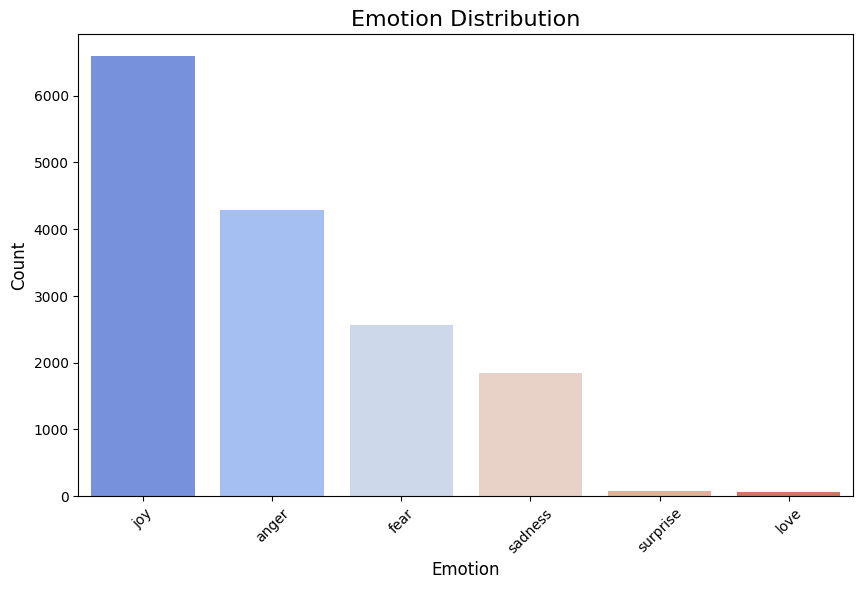

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for emotions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Emotion", order=df["Emotion"].value_counts().index, palette="coolwarm")
plt.title("Emotion Distribution", fontsize=16)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


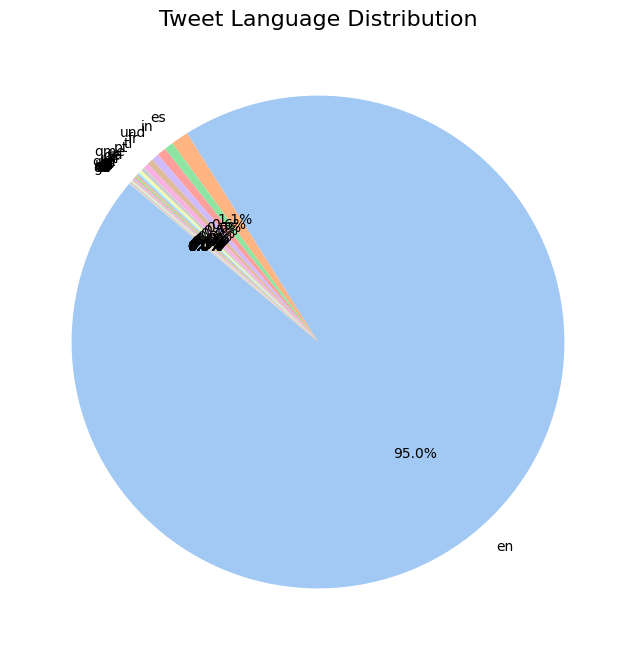

In [7]:
# Language distribution pie chart
language_counts = df["Tweet_Language"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Tweet Language Distribution", fontsize=16)
plt.show()


<ipython-input-8-dff4b5e57bff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")


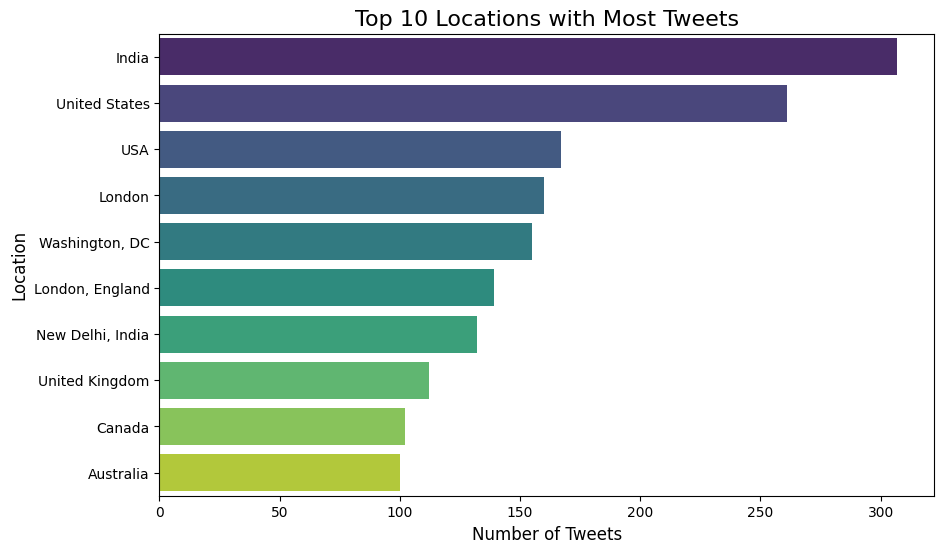

In [8]:
# Top 10 locations with the most tweets
top_locations = df["User_Location"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title("Top 10 Locations with Most Tweets", fontsize=16)
plt.xlabel("Number of Tweets", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.show()


<ipython-input-9-5583daab764b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tweet_Date"] = df["Tweet_DateTime"].dt.date


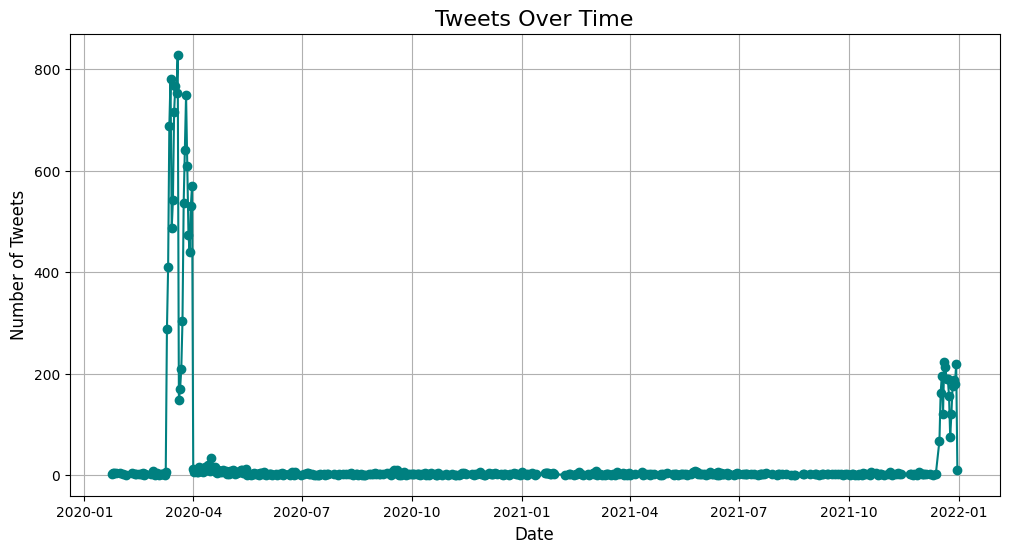

In [9]:
# Ensure Tweet_DateTime is in datetime format
df["Tweet_DateTime"] = pd.to_datetime(df["Tweet_DateTime"], errors="coerce")

# Drop rows with invalid datetime values (if any)
df = df.dropna(subset=["Tweet_DateTime"])

# Extract the date part
df["Tweet_Date"] = df["Tweet_DateTime"].dt.date

# Aggregate tweets by date
tweets_over_time = df.groupby("Tweet_Date").size()

# Plot tweets over time
plt.figure(figsize=(12, 6))
tweets_over_time.plot(kind="line", marker="o", color="teal")
plt.title("Tweets Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.grid(True)
plt.show()


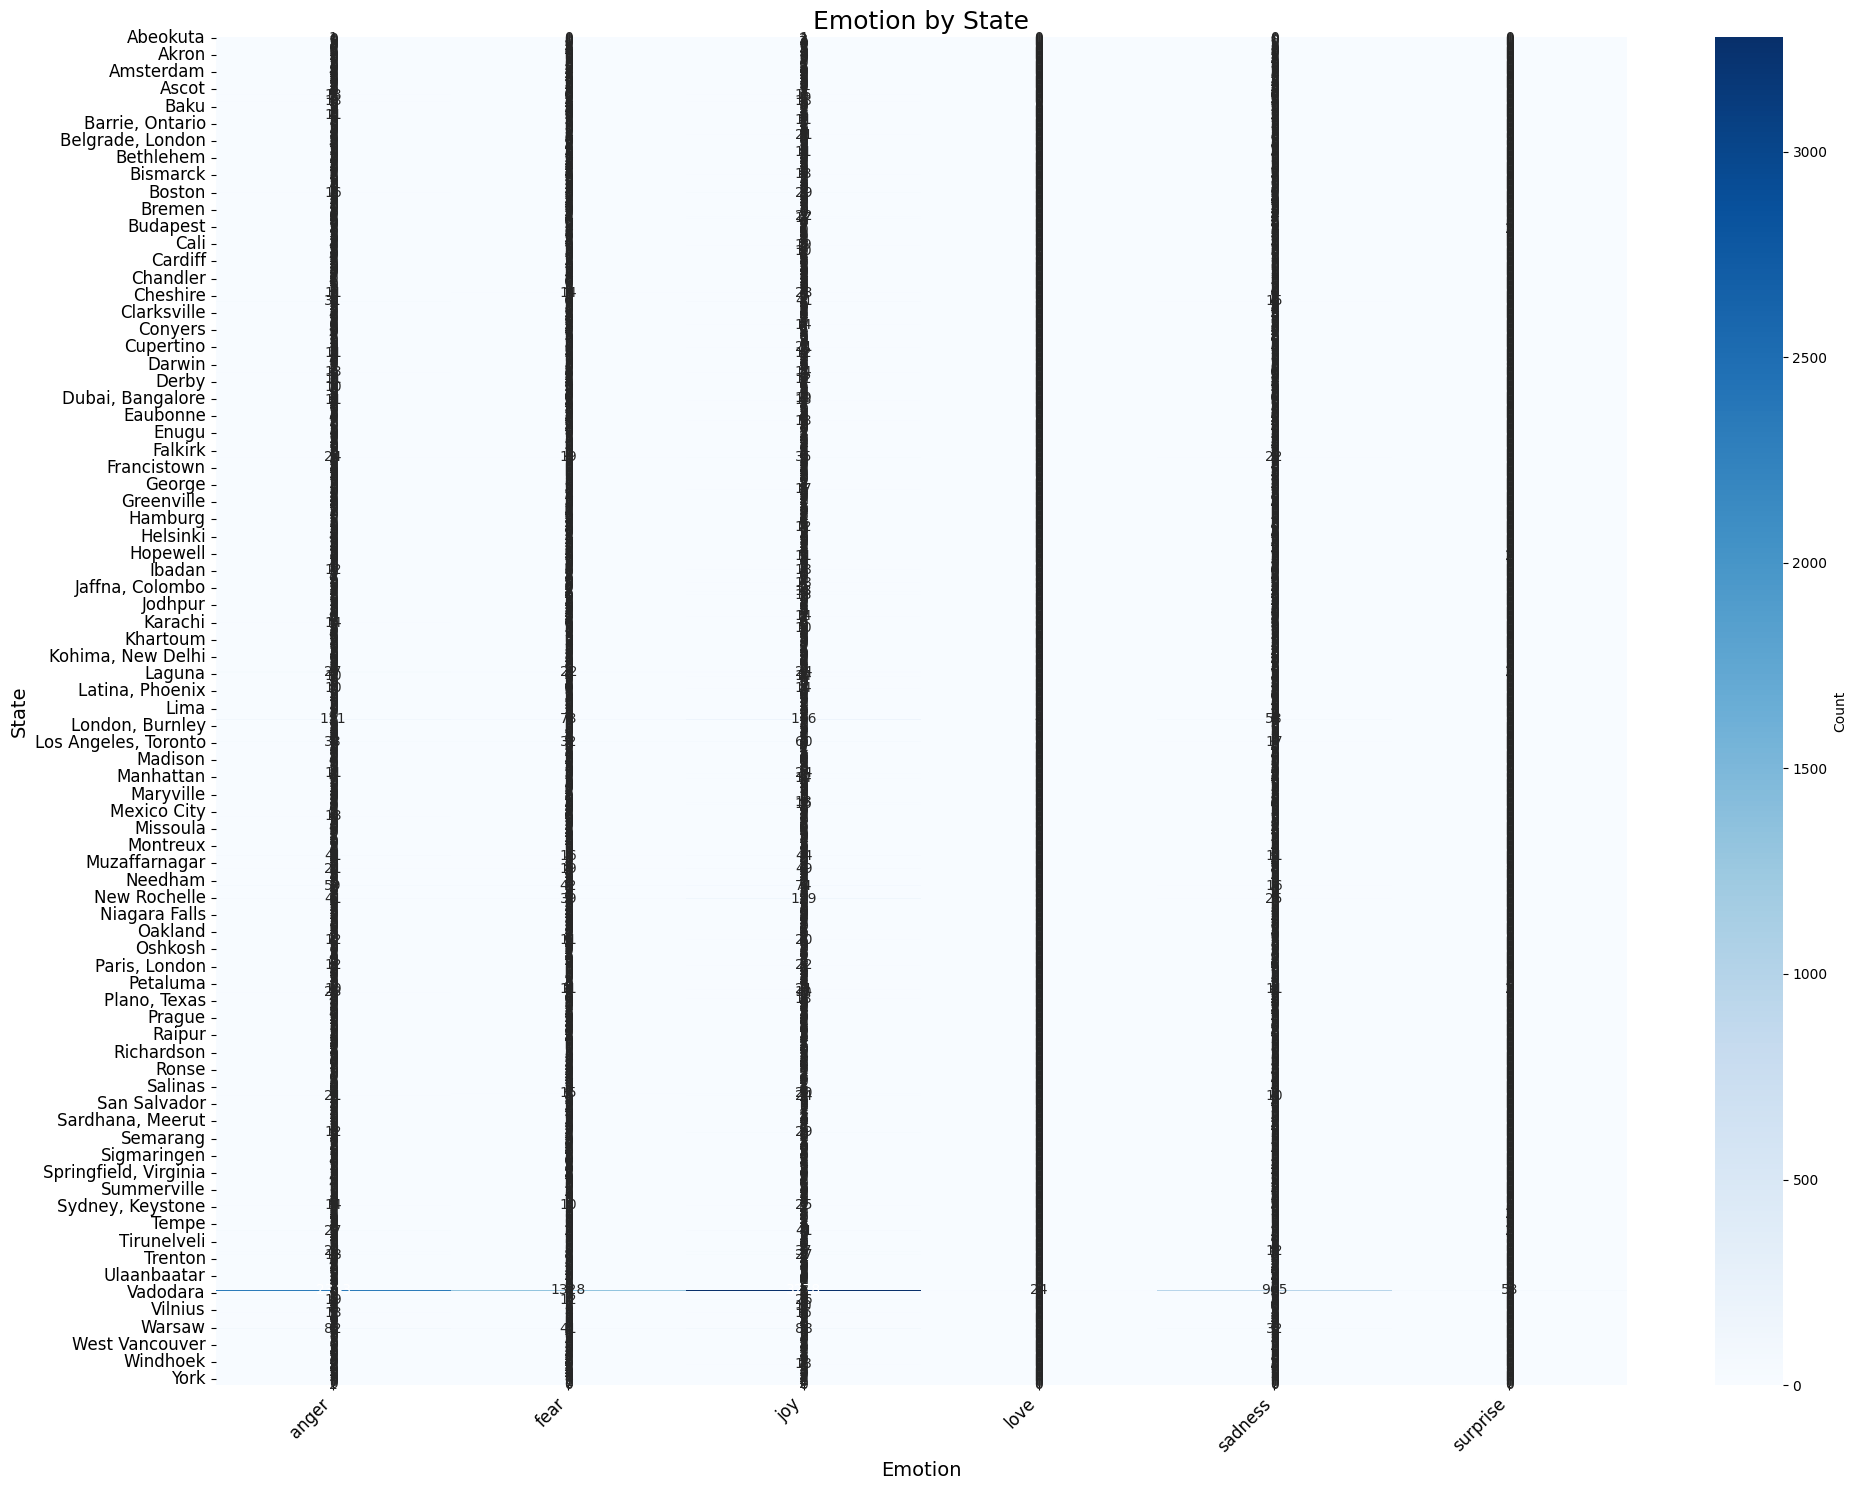

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot table for emotions by state
emotion_state = df.pivot_table(index="State", columns="Emotion", aggfunc="size", fill_value=0)
plt.figure(figsize=(20, 15))  # Larger figure for more space
sns.heatmap(
    emotion_state,
    cmap="Blues",
    annot=True,
    fmt="d",
    annot_kws={"size": 10},   # Increase annotation size for clarity
    linewidths=0,            # Remove vertical gridlines to avoid obstruction
    cbar_kws={'label': 'Count'}  # Add a colorbar label for context
)

plt.title("Emotion by State", fontsize=18)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)                           # Increase y-axis label font size
plt.tight_layout()                                # Adjust layout to avoid overlaps
plt.show()



In [16]:
import plotly.express as px

# Prepare data for plotting
country_counts = df["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Tweet Count"]

# World map plot
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Tweet Count",
                    title="Tweet Count by Country",
                    color_continuous_scale="Viridis")
fig.show()